# Lecture 11&12 Deep Learning

In [1]:
%matplotlib inline
# import necessary libraries and specify that graphs should be plotted inline. 
import matplotlib.pyplot as plt
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [2]:
np.random.seed(13)

from keras import backend as K
from keras.models import Sequential
from keras.datasets import mnist
from keras.layers import Dense, Activation, Dropout
from keras.utils import np_utils

Using TensorFlow backend.


### MNIST Dataset

In [3]:
# visualization
def draw_digit(data, row, col, n):
    plt.subplot(row, col, n)    
    plt.imshow(data)
    plt.gray()

In [4]:
img_rows, img_cols = 28, 28
nb_classes = 10

# data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols) 
X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')



X_train shape: (60000, 1, 28, 28)
60000 train samples
10000 test samples


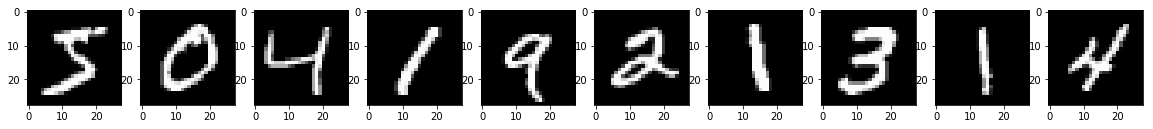

In [5]:
show_size = 10
plt.figure(figsize=(20,20))

for i in range(show_size):
    draw_digit(X_train[i].reshape(28,28), 1, show_size, i+1)
plt.show()

## MLP

In [6]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

num_classes = 10 # class size
input_unit_size = 28*28 # input vector size

x_train = x_train.reshape(x_train.shape[0], input_unit_size)
x_test  = x_test.reshape(x_test.shape[0], input_unit_size)
x_train = x_train.astype('float32')
x_test  = x_test.astype('float32')
x_train /= 255
x_test  /= 255

# one-hot representation
y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Dense(128, input_dim=input_unit_size, activation='relu'))
# kernel_regularizer=keras.regularizers.l2(0.001)

model.add(Dropout(rate=0.2))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adadelta', metrics=['accuracy'])
# from keras import optimizers
# oprimizer = optimizers.SGD(lr=0.01, clipnorm=1.)

result = model.fit(x_train, y_train, epochs=20, batch_size=256, verbose=2,  validation_split=0.15)

Train on 51000 samples, validate on 9000 samples
Epoch 1/20
 - 1s - loss: 0.5359 - acc: 0.8484 - val_loss: 0.2586 - val_acc: 0.9279
Epoch 2/20
 - 1s - loss: 0.2685 - acc: 0.9242 - val_loss: 0.1824 - val_acc: 0.9492
Epoch 3/20
 - 1s - loss: 0.2091 - acc: 0.9396 - val_loss: 0.1524 - val_acc: 0.9586
Epoch 4/20
 - 1s - loss: 0.1736 - acc: 0.9501 - val_loss: 0.1313 - val_acc: 0.9643
Epoch 5/20
 - 1s - loss: 0.1506 - acc: 0.9567 - val_loss: 0.1153 - val_acc: 0.9654
Epoch 6/20
 - 1s - loss: 0.1309 - acc: 0.9615 - val_loss: 0.1074 - val_acc: 0.9694
Epoch 7/20
 - 1s - loss: 0.1184 - acc: 0.9655 - val_loss: 0.1018 - val_acc: 0.9709
Epoch 8/20
 - 1s - loss: 0.1090 - acc: 0.9686 - val_loss: 0.0912 - val_acc: 0.9739
Epoch 9/20
 - 1s - loss: 0.1008 - acc: 0.9714 - val_loss: 0.0877 - val_acc: 0.9751
Epoch 10/20
 - 1s - loss: 0.0924 - acc: 0.9730 - val_loss: 0.0829 - val_acc: 0.9754
Epoch 11/20
 - 1s - loss: 0.0871 - acc: 0.9740 - val_loss: 0.0805 - val_acc: 0.9758
Epoch 12/20
 - 1s - loss: 0.0826 - a

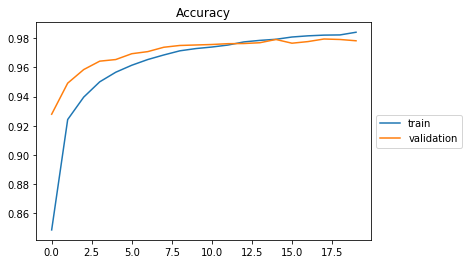

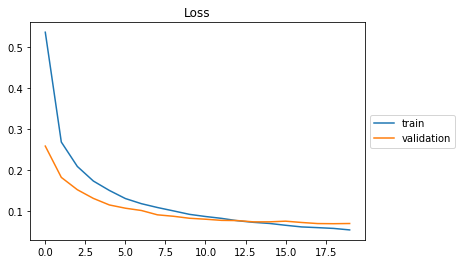

In [7]:
x = range(20)
plt.plot(x, result.history['acc'], label='train')
plt.plot(x, result.history['val_acc'], label='validation')
plt.title('Accuracy')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

plt.plot(x, result.history['loss'], label='train')
plt.plot(x, result.history['val_loss'], label='validation')
plt.title('Loss')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [8]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               100480    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


## CNN

In [19]:
import keras
from keras import backend as K
from keras.models import Sequential
from keras.datasets import mnist
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras.preprocessing import sequence


In [25]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [26]:
batch_size = 128
num_classes = 10
epochs = 12

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 87s 1ms/step - loss: 0.2821 - acc: 0.9129 - val_loss: 0.0589 - val_acc: 0.9802
Epoch 2/12
60000/60000 [==============================] - 89s 1ms/step - loss: 0.0911 - acc: 0.9735 - val_loss: 0.0438 - val_acc: 0.9856
Epoch 3/12
60000/60000 [==============================] - 87s 1ms/step - loss: 0.0662 - acc: 0.9803 - val_loss: 0.0368 - val_acc: 0.9881
Epoch 4/12
60000/60000 [==============================] - 89s 1ms/step - loss: 0.0575 - acc: 0.9835 - val_loss: 0.0341 - val_acc: 0.9879
Epoch 5/12
60000/60000 [==============================] - 86s 1ms/step - loss: 0.0496 - acc: 0.9854 - val_loss: 0.0354 - val_acc: 0.9887
Epoch 6/12
60000/60000 [==============================] - 87s 1ms/step - loss: 0.0428 - acc: 0.9874 - val_loss: 0.0335 - val_acc: 0.9894
Epoch 7/12
60000/60000 [==============================] - 85s 1ms/step - loss: 0.0372 - acc: 0.9883 - val_loss: 0.0371 - val_acc

In [27]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.02731389767081864
Test accuracy: 0.9917


### RNN

In [1]:
# source: https://machinelearningmastery.com/time-series-prediction-lstm-recurrent-neural-networks-python-keras/

import pandas
import matplotlib.pyplot as plt
dataset = pandas.read_csv('international-airline-passengers.csv', usecols=[1], engine='python', skipfooter=3)
plt.plot(dataset)
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'international-airline-passengers.csv'

In [29]:
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [30]:
# fix random seed for reproducibility
np.random.seed(7)

In [39]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

# load the dataset
dataframe = pandas.read_csv('international-airline-passengers.csv', usecols=[1], engine='python', skipfooter=3)
dataset = dataframe.values
dataset = dataset.astype('float32')
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))


In [40]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)


Epoch 1/100
 - 1s - loss: 0.0383
Epoch 2/100
 - 0s - loss: 0.0190
Epoch 3/100
 - 0s - loss: 0.0144
Epoch 4/100
 - 0s - loss: 0.0131
Epoch 5/100
 - 0s - loss: 0.0122
Epoch 6/100
 - 0s - loss: 0.0116
Epoch 7/100
 - 0s - loss: 0.0105
Epoch 8/100
 - 0s - loss: 0.0097
Epoch 9/100
 - 0s - loss: 0.0088
Epoch 10/100
 - 0s - loss: 0.0080
Epoch 11/100
 - 0s - loss: 0.0071
Epoch 12/100
 - 0s - loss: 0.0062
Epoch 13/100
 - 0s - loss: 0.0055
Epoch 14/100
 - 0s - loss: 0.0047
Epoch 15/100
 - 0s - loss: 0.0041
Epoch 16/100
 - 0s - loss: 0.0036
Epoch 17/100
 - 0s - loss: 0.0032
Epoch 18/100
 - 0s - loss: 0.0028
Epoch 19/100
 - 0s - loss: 0.0025
Epoch 20/100
 - 0s - loss: 0.0023
Epoch 21/100
 - 0s - loss: 0.0023
Epoch 22/100
 - 0s - loss: 0.0021
Epoch 23/100
 - 0s - loss: 0.0021
Epoch 24/100
 - 0s - loss: 0.0021
Epoch 25/100
 - 0s - loss: 0.0020
Epoch 26/100
 - 0s - loss: 0.0020
Epoch 27/100
 - 0s - loss: 0.0020
Epoch 28/100
 - 0s - loss: 0.0020
Epoch 29/100
 - 0s - loss: 0.0020
Epoch 30/100
 - 0s - lo

In [41]:
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 23.96 RMSE
Test Score: 54.47 RMSE


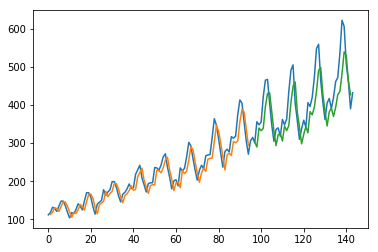

In [42]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()